In [15]:
from astropy.io import fits
#from astropy.modeling import models, fitting
from astropy.utils.exceptions import AstropyUserWarning
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path
import numpy as np
import lmfit
from lmfit.models import GaussianModel 
from lmfit.lineshapes import gaussian2d
from scipy.interpolate import griddata
from scipy import optimize
from astropy.modeling import models, fitting


In [6]:
#data_path = Path("C:/Users/ajo5182/Documents/astro/point spread funtion and localization accuracy/image_reconstruction.fits")
#data_path = Path("c:/Users/ajo5182/Documents/astro/y2024-12-09/BC001_Al_FF_243K_HORI_0_0/Analysis/imaging_analysis_20241213/image_reconstruction.fits.gz")
#data_path = Path("c:/Users/ajo5182/Documents/astro/y2024-12-09/BC001_Al_FF_243K_HORI_35_0/Analysis/imaging_analysis_20241213/image_reconstruction.fits.gz")
data_path = Path("Z:\Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\y2024-11-18\BC_Ti_EffArr_1_R04\Analysis\imaging_analysis_20241120\image_reconstruction.fits.gz")

d = fits.open(data_path) # open fits file

data = d[0].data # data contents of the fits file
shape =  data.shape
imPixelSize = 0.0149 # pixel size degrees
#imPixelSize = 0.0149 # pixel size degrees

#change y lab to xlab, and vice versa

ylab = imPixelSize * np.linspace((shape[0]-1)/-2,(shape[0]-1)/2, shape[0]) # create array from -23 deg to 23 deg, centered on zero
xlab = imPixelSize * np.linspace((shape[1]-1)/-2,(shape[1]-1)/2, shape[1]) # create array from -41 deg to 41 deg, centered on zero


<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ajo5182\AppData\Local\Temp\ipykernel_16356\307416738.py:4: SyntaxWarning: invalid escape sequence '\A'
  data_path = Path("Z:\Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\y2024-11-18\BC_Ti_EffArr_1_R04\Analysis\imaging_analysis_20241120\image_reconstruction.fits.gz")


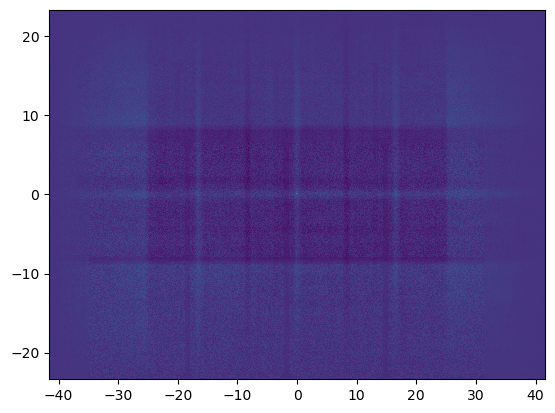

In [7]:
fig,ax =  plt.subplots()
ax.pcolormesh(xlab, ylab, data)

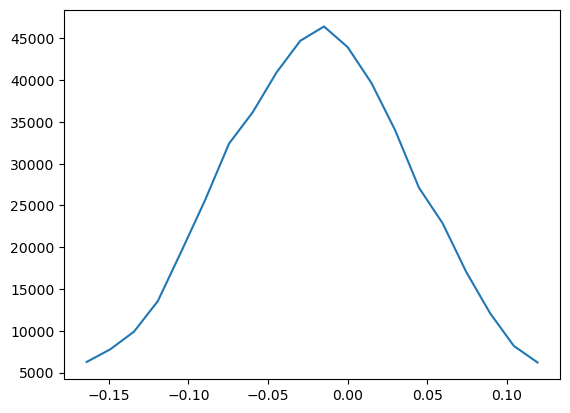

In [8]:
peak = np.max(data)
peak_loc = np.unravel_index(np.argmax(data),data.shape)
window = 10

if peak_loc[1]-window < 0:
    data_windowed = data[peak_loc[0]-window:peak_loc[0]+window,0:peak_loc[1]+window]
else:
    data_windowed = data[peak_loc[0]-window:peak_loc[0]+window,peak_loc[1]-window:peak_loc[1]+window]


if peak_loc[1]-window < 0:
    xfit_xcut = 1* xlab[0:peak_loc[1]+window]
    
else:
    xfit_xcut = 1* xlab[peak_loc[1]-window:peak_loc[1]+window]

yfit_xcut = data[peak_loc[0]-window:peak_loc[0]+window,peak_loc[1]]

if yfit_xcut.shape > xfit_xcut.shape :
    yfit_xcut = np.delete(yfit_xcut,0)

plt.plot(xfit_xcut,yfit_xcut)
#plt.plot(xlab[peak_loc[0]-window:peak_loc[0]+window], data[peak_loc[0]-window:peak_loc[0]+window,peak_loc[1]])
#plt.plot(data)

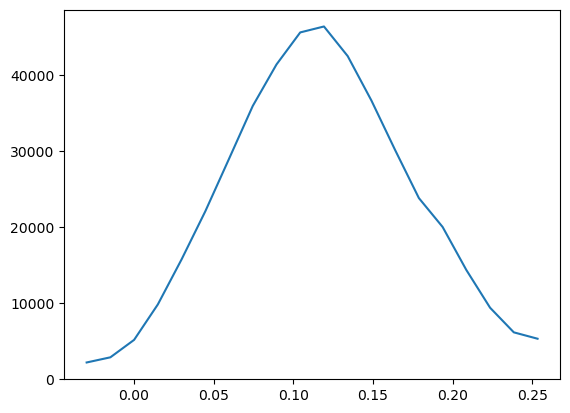

In [9]:
xfit_ycut =ylab[peak_loc[0]-window:peak_loc[0]+window]
yfit_ycut = data[peak_loc[0],peak_loc[1]-window:peak_loc[1]+window]

if peak_loc[1]-window < 0:
    yfit_ycut = data[peak_loc[0],0:peak_loc[1]+window]
else:
    yfit_ycut = data[peak_loc[0],peak_loc[1]-window:peak_loc[1]+window]

if yfit_ycut.shape < xfit_ycut.shape :
    xfit_ycut = np.delete(xfit_ycut,0)

plt.plot(xfit_ycut,yfit_ycut)


[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 20
    # variables        = 3
    chi-square         = 14999664.6
    reduced chi-square = 882333.210
    Akaike info crit   = 276.556122
    Bayesian info crit = 279.543319
    R-squared          = 0.99609476
[[Variables]]
    amplitude:  7531.50077 +/- 69.9873546 (0.93%) (init = 7187.7)
    center:    -0.01880902 +/- 7.0611e-04 (3.75%) (init = -0.0149)
    sigma:      0.06677345 +/- 7.3574e-04 (1.10%) (init = 0.0596)
    fwhm:       0.15723945 +/- 0.00173254 (1.10%) == '2.3548200*sigma'
    height:     44997.4408 +/- 413.056606 (0.92%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = +0.6031


c:\Users\ajo5182\AppData\Local\miniconda3\envs\xhcd\Lib\site-packages\uncertainties\core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


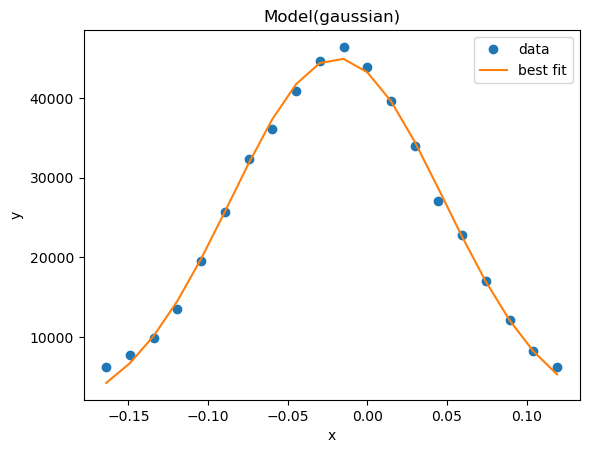

In [10]:
Xmodel  = GaussianModel()
params = Xmodel.guess(yfit_xcut, xfit_xcut)
Xresult = Xmodel.fit(yfit_xcut, params,x = xfit_xcut)
Xresult.plot_fit()
print(Xresult.fit_report())

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 20
    # variables        = 3
    chi-square         = 28752823.9
    reduced chi-square = 1691342.58
    Akaike info crit   = 289.570285
    Bayesian info crit = 292.557482
    R-squared          = 0.99355447
[[Variables]]
    amplitude:  6678.46016 +/- 89.5342356 (1.34%) (init = 6920.2)
    center:     0.11519263 +/- 9.0812e-04 (0.79%) (init = 0.11175)
    sigma:      0.05894712 +/- 9.2114e-04 (1.56%) (init = 0.05215)
    fwhm:       0.13880986 +/- 0.00216913 (1.56%) == '2.3548200*sigma'
    height:     45198.4789 +/- 604.009976 (1.34%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = +0.5855


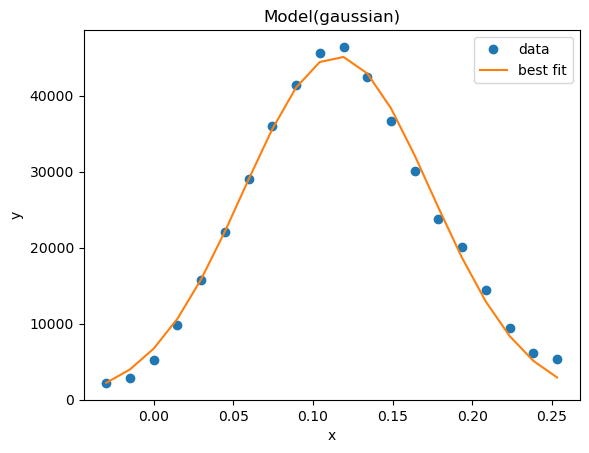

In [14]:
Ymodel  = GaussianModel()
params = Xmodel.guess(yfit_ycut, xfit_ycut)
Yresult = Xmodel.fit(yfit_ycut, params,x = xfit_ycut)
Yresult.plot_fit()
print(Yresult.fit_report())
#Yresult.params.pretty_print()
fwhm = Yresult.params["fwhm"]

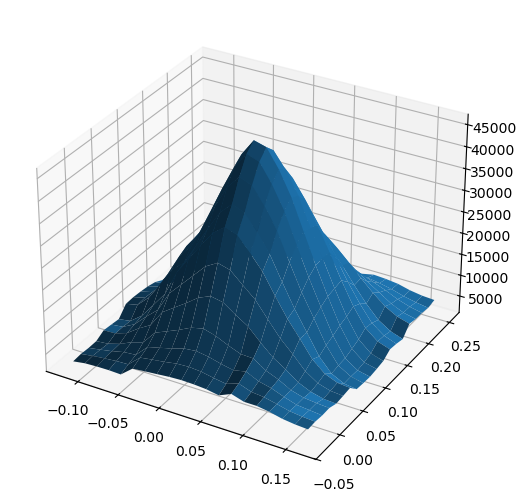

In [24]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
X,Y = np.meshgrid(-1* xlab[peak_loc[1]-window:peak_loc[1]+window],ylab[peak_loc[0]-window:peak_loc[0]+window])
ax.plot_surface(X,Y, data_windowed)

#params2d = fitgaussian(data_windowed)
#plt.imshow(data_windowed)

In [16]:
def generate_rotated_gaussian_data(x,y,amp,xmean,ymean,xstd, ystd,theta):
    #y, x = np.mgrid[0:100, 0:100]
    model = models.Gaussian2D(amp,xmean,ymean,xstd, ystd,theta)
    data = model(x, y)
    return data

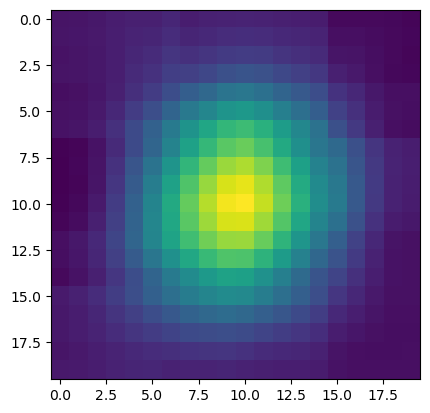

In [25]:
plt.imshow(data_windowed)

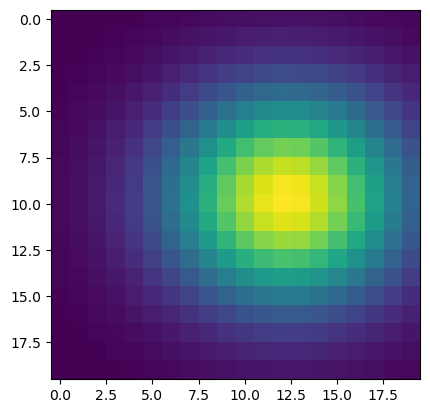

In [21]:
test = generate_rotated_gaussian_data(X,Y, np.mean([Yresult.params['amplitude'].value, Xresult.params['amplitude'].value ]),
                                      Xresult.params['center'].value,Yresult.params['center'].value,Xresult.params['sigma'].value,Yresult.params['sigma'].value,0
                                      )
plt.imshow(test)